## Mixed nuts with peanuts

In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import numpy as np
import random

#### Original Sample

Containers of mixed nuts often contain peanuts as well as cashews, pecans, almonds,
and other nuts. For one brand, we want to estimate the proportion of mixed nuts
that are peanuts. We get a jar of the nuts and assume that the nuts in that container
represent a random sample of all the mixed nuts sold by that company. We open the
jar and count 100 nuts of which 52 are peanuts. 

$ \hat p = 0.52 \\
N = 100$

In [2]:
SIMULATIONS = 5000
N = 100 # Original sample of 100 nuts
p_hat = 0.52 # Count of peanuts in original sample

Helper function

In [3]:
def add_text(ax, t, xy):
    ax = ax.annotate(t, xy=xy, xycoords='data',
        xytext=(30, 0), textcoords='offset points')

#### Approach 1 `random.choices`

In [4]:
p = []
for simulation in range(SIMULATIONS):
    p.append(sum(random.choices([1,0], weights=[p_hat, 1-p_hat], k = N))/N)
    
avg = sum(p) / len(p)

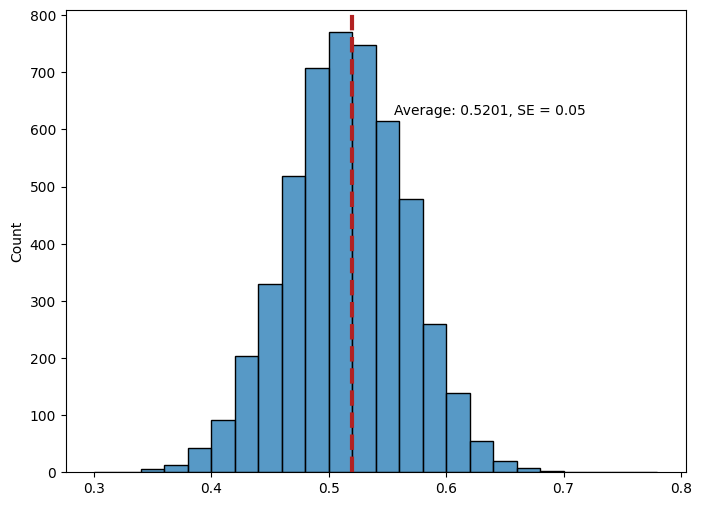

In [5]:
fig, ax = plt.subplots(figsize =(8,6))
ax = sns.histplot(x = p, bins = np.arange(0.30, 0.80, 0.02), ax = ax)
ax.axvline(x=avg, linewidth=3, color='firebrick', linestyle = 'dashed')
add_text(ax, f'Average: {avg:.4f}, SE = {np.std(p, ddof = 1):.2f}', (avg, 625))

#### Approach 2  `random.choices` wth entire list

In [6]:
l = [1 for i in range(52)]
r = [0 for i in range(48)]
peanuts = l + r
random.shuffle(peanuts)

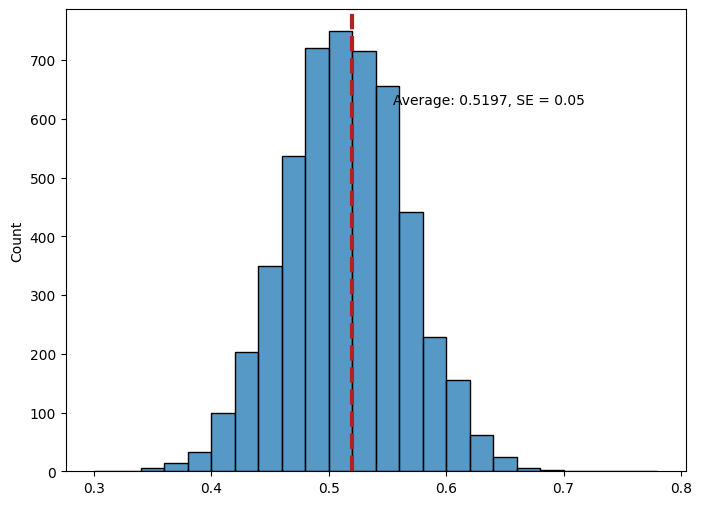

In [7]:
p = []

for simulation in range(SIMULATIONS):
    p.append(sum(random.choices(peanuts, k = len(peanuts)))/N)    
avg = sum(p) / len(p)

fig, ax = plt.subplots(figsize =(8,6))
ax = sns.histplot(x = p, bins = np.arange(0.30, 0.80, 0.02), ax = ax)
ax.axvline(x=avg, linewidth=3, color='firebrick', linestyle = 'dashed')
add_text(ax, f'Average: {avg:.4f}, SE = {np.std(p, ddof = 1):.2f}', (avg, 625))